In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2023 - 4 - 26)

# ___Sampling Simulation___
---------------

In [90]:
def draw_sample(nattempts: int, sample_size: int, gym_frac: float) -> None:
    
    population_size = 100_000
    mean_uofm = 155
    stddev_uofm = 5
    mean_gym = 185 
    stddev_gym = 5 

    assert (nattempts > 0), "nattempts must be greater than zero"
    assert (sample_size > 0), "sample_size must be greater than zero"
    assert (gym_frac >= 0) and (gym_frac <= 1), "gym_frac must be greater than/equal to zero and less than/equal to one"

    population = np.random.normal(loc = mean_uofm, scale = stddev_uofm, size = int(population_size * (1 - gym_frac)))
    gym_goers = np.random.normal(loc = mean_gym, scale = stddev_gym, size = int(population_size * gym_frac))
    population = np.append(population, gym_goers)
    
    sample_means = []
    
    for i in range(nattempts):
        sample = np.random.choice(population, size = sample_size, replace = True)
        sample_means.append(sample.mean())
        
    fig, (axes_all, axes_sampledist)  = plt.subplots(nrows = 2)
    fig.set_size_inches(15, 6)
    
    axes_all.hist(gym_goers, bins = 100, color = "red", rwidth = 0.9, alpha = 0.25, label = f"Gym goers ({(gym_frac * 100)}%)")
    axes_all.hist(population, bins = 100, color = "blue", rwidth = 0.9, alpha = 0.25, label = "All UoM Students")
    axes_all.legend()
    
    axes_sampledist.hist(sample_means, bins = 100, color = "green", rwidth = 0.9, alpha = 0.6)
    axes_sampledist.vlines(x = np.mean(sample_means), ymin = 0, ymax = axes_sampledist.get_ylim()[1],
                          color = "violet", label = "Mean of sample means")
    axes_sampledist.vlines(x = population.mean(), ymin = 0, ymax = axes_sampledist.get_ylim()[1],
                          color = "black", label = "Mean of population")
    axes_sampledist.legend()
    axes_sampledist.set_title("Sampling distribution", pad = .5)
    plt.show()

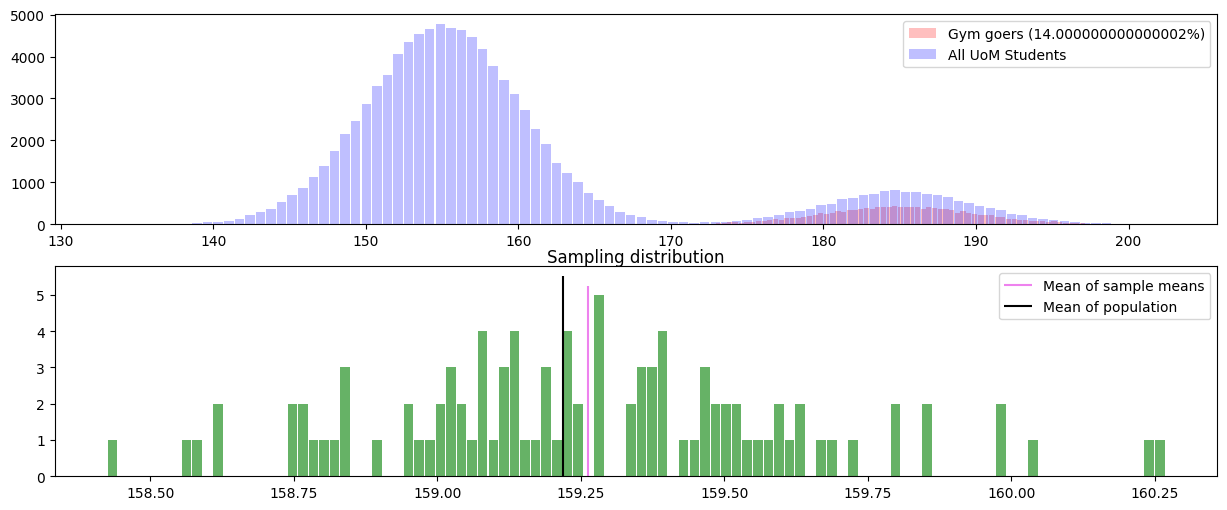

In [98]:
draw_sample(nattempts = 100, sample_size = 1000, gym_frac = 0.14)

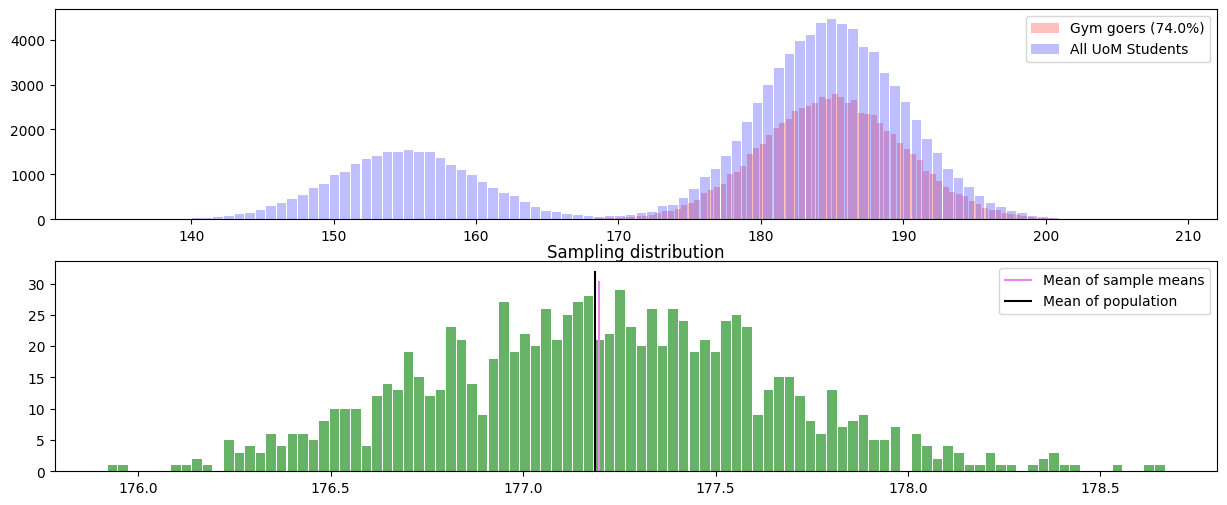

In [101]:
draw_sample(nattempts = 1000, sample_size = 1000, gym_frac = 0.74)

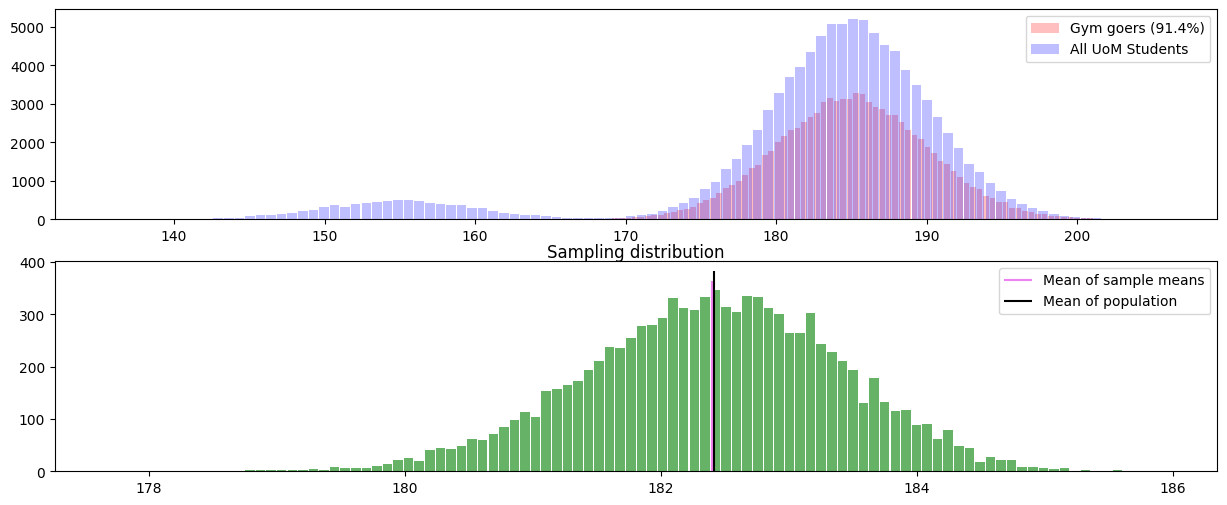

In [104]:
draw_sample(nattempts = 10000, sample_size = 100, gym_frac = 0.914)

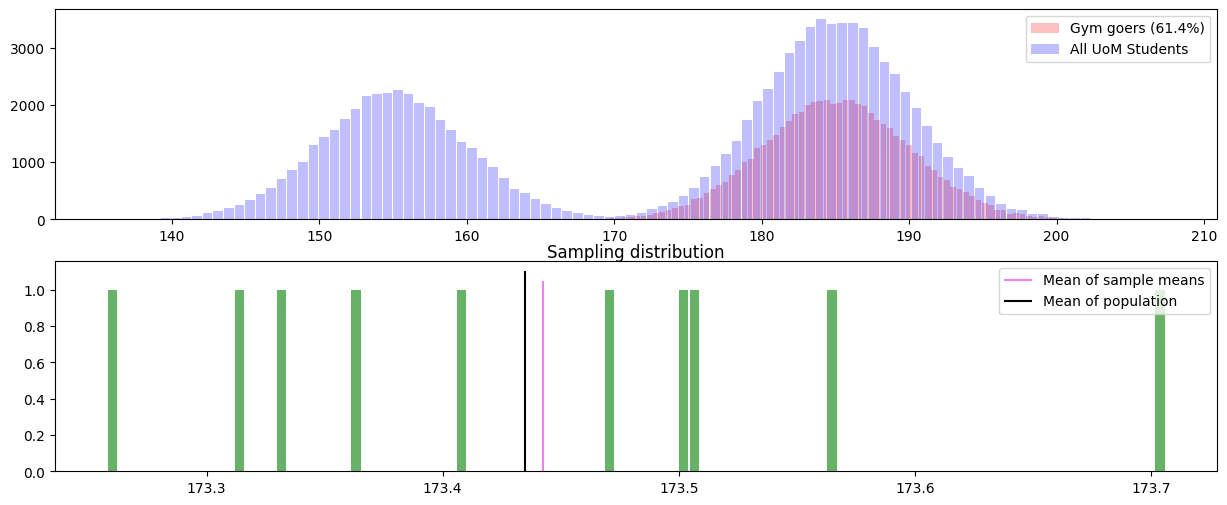

In [105]:
draw_sample(nattempts = 10, sample_size = 10000, gym_frac = 0.614)

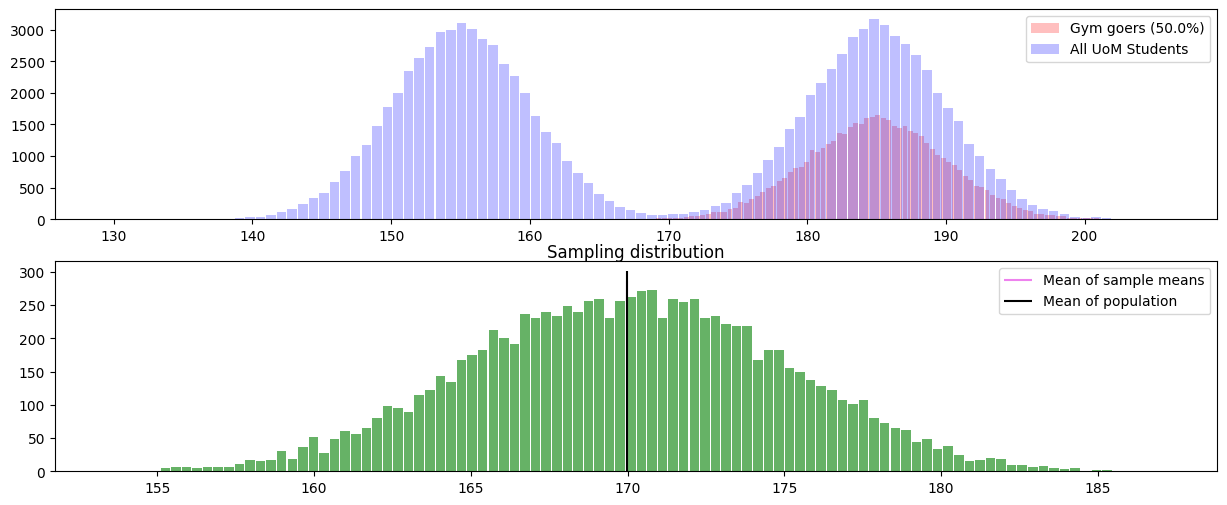

In [111]:
draw_sample(nattempts = 10000, sample_size = 10, gym_frac = 0.5)